# Pregunta 3

Máquinas de aprendizaje para reconocimiento de imágenes en CIFAR10. Este es un dataset balanceado de 60000 imágenes de 32x32 pixeles, con 10 clases. En este caso se han dividido 50000 imágenes de entrenamiento y 10000 de prueba. Las clases a las cuales pertenece la imagen se muestran a continuación.

In [1]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print label_names

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## a) Cargar datos de entrenamiento, prueba y validación.

Se eligen como máximo 10000 imágenes del conjunto de entrenamiento para generar el conjunto de validación.

In [2]:
import cPickle as pickle
import numpy as np
import os
from sklearn.model_selection import train_test_split

def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

def load_CIFAR_one(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f)
        X = datadict['data']
        Y = datadict['labels']
        return X, np.array(Y)
    
def load_CIFAR10(PATH, n_val=10000):
    if n_val > 10000:
        n_val = 10000
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(PATH, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_one(f)
        xs.append(X)
        ys.append(Y)
    xtr = np.concatenate(xs)
    ytr = np.concatenate(ys)
    Xtr, Xval, Ytr, Yval = train_test_split(xtr, ytr, test_size=n_val, random_state=0)
    #Xval = Xtr[-n_val:Xtr.shape[0]]
    #Yval = Ytr[-n_val:Ytr.shape[0]]
    #Xtr = Xtr[:-n_val]
    #Ytr = Ytr[:-n_val]
    del X, Y, xtr, ytr
    Xte, Yte = load_CIFAR_one(os.path.join(PATH, 'test_batch'))
    return Xtr, Ytr, Xval, Yval, Xte, Yte

In [7]:
Xtr, Ytr, Xval, Yval, Xte, Yte = load_CIFAR10('.')

## b) Escalamiento de datos.

In [8]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler

def scaler_function(Xtr,Xval,Xt,other=True, scale=True):
    if other:
        Xtr_scaled = Xtr / 255.
        Xval_scaled = Xval / 255.
        Xt_scaled = Xt / 255.
        return Xtr_scaled, Xval_scaled, Xt_scaled
    scaler = StandardScaler(with_std=scale).fit(Xtr)
    Xtr_scaled = scaler.transform(Xtr)
    Xval_scaled = scaler.transform(Xval)
    Xt_scaled = scaler.transform(Xt)
    return Xtr_scaled, Xval_scaled, Xt_scaled

Using Theano backend.


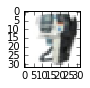

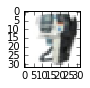

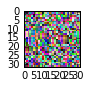

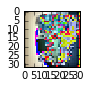

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# Imagen de ejemplo sin dataset escalado.
plt.figure(figsize=(1,1))
sample = Xtr[12].reshape(3,32,32).T
plt.imshow(sample, interpolation="nearest")
plt.show()


# Imagen de ejemplo normalizando pixeles por 255
Xtr_scaled, Xval_scaled, Xt_scaled = scaler_function(Xtr.astype(np.float64), 
                                                     Xval.astype(np.float64), 
                                                     Xte.astype(np.float64),
                                                     other=True)
plt.figure(figsize=(1,1))
sample = Xtr_scaled[12].reshape(3,32,32).T
plt.imshow(sample, interpolation="nearest")
plt.show()
del Xtr_scaled, Xval_scaled, Xt_scaled


# Imagen de ejemplo solo centrando datos
Xtr_scaled, Xval_scaled, Xt_scaled = scaler_function(Xtr.astype(np.float64), 
                                                     Xval.astype(np.float64), 
                                                     Xte.astype(np.float64), 
                                                     other=False, scale=False)
plt.figure(figsize=(1,1))
sample = Xtr_scaled[12].reshape(3,32,32).T
plt.imshow(sample, interpolation="nearest")
plt.show()

# Imagen de ejemplo normalizando datos
Xtr_scaled, Xval_scaled, Xt_scaled = scaler_function(Xtr.astype(np.float64),
                                                     Xval.astype(np.float64),
                                                     Xte.astype(np.float64),
                                                     other=False, scale=True)
plt.figure(figsize=(1,1))
sample = Xtr_scaled[12].reshape(3,32,32).T
plt.imshow(sample, interpolation="nearest")
plt.show()

## c) Redes neuronales con distintas arquitecturas para clasificación de CIFAR10

Estas redes tienen, nominalmente, el propósito de bajar el error de pruebas bajo 0.5. Las métricas analizadas son loss (binary crossentropy) y el error de accuracy.

In [5]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD

Using Theano backend.


In [8]:
# Escalar datos
Xtr, Xval, Xte = scaler_function(Xtr, Xval, Xte, other=False)
Ytr_cat = to_categorical(Ytr, 10)
Yval_cat = to_categorical(Yval, 10)
Yte_cat = to_categorical(Yte, 10)

/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### 1) Modelo entregado en enunciado

In [15]:
model = Sequential()
model.add(Dense(100, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xtr, Ytr_cat, nb_epoch=50, batch_size=32, verbose=1, validation_data=(Xval,Yval_cat))
model.save("arch_1.h5")

In [9]:
model = load_model("arch_1.h5")
scores = model.evaluate(Xval, Yval_cat,)
print "\nError de accuracy: ", 1 - scores[1]
print "\nLoss:", scores[0]
del model

 9952/10000 [============================>.] - ETA: 0s
Error de accuracy:  0.0836399992943

Loss: 0.227352060699


### 2) Modelo deep 3 de capas ocultas y mix de activaciones

In [17]:
model = Sequential()
model.add(Dense(200, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100, init='uniform', activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(50, init='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xtr, Ytr_cat, nb_epoch=50, batch_size=32, verbose=1, validation_data=(Xval,Yval_cat))
model.save("arch_2.h5")

In [10]:
model = load_model("arch_2.h5")
scores = model.evaluate(Xval, Yval_cat,)
print "\nError de accuracy: ", 1 - scores[1]
print "\nLoss:", scores[0]
del model

 9952/10000 [============================>.] - ETA: 0s
Error de accuracy:  0.0971399983406

Loss: 0.443895714951


### 3) Modelo anterior con dropout aumentado

In [ ]:
model = Sequential()
model.add(Dense(200, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(100, init='uniform', activation='sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(50, init='uniform', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xtr, Ytr_cat, nb_epoch=50, batch_size=32, verbose=1, validation_data=(Xval,Yval_cat))
model.save("arch_3.h5")

In [12]:
model = load_model("arch_3.h5")
scores = model.evaluate(Xval, Yval_cat,)
print "\nError de accuracy: ", 1 - scores[1]
print "\nLoss:", scores[0]
del model

 9952/10000 [============================>.] - ETA: 0s
Error de accuracy:  0.0799599991798

Loss: 0.208769626927


El error de accuracy y la métrica loss sobre el conjunto de validación fue menor para el último modelo. Finalmente los resultados sobre el conjunto de pruebas se reportan a continuación:

In [13]:
model = load_model("arch_3.h5")
scores = model.evaluate(Xte, Yte_cat,)
print "\nError de accuracy: ", 1 - scores[1]
print "\nLoss:", scores[0]
del model

 9984/10000 [============================>.] - ETA: 0s
Error de accuracy:  0.0808700006485

Loss: 0.208661009645


## d) Mejorando resultados con features de alto nivel.

In [11]:
from top_level_features import hog_features
from top_level_features import color_histogram_hsv
from top_level_features import extract_features

In [ ]:
Xtr, Ytr, Xval, Yval, Xte, Yte = load_CIFAR10('.')

features_Xtr = extract_features(Xtr,[hog_features, color_histogram_hsv])
features_Xval = extract_features(Xval,[hog_features, color_histogram_hsv])

Ytr_cat = to_categorical(Ytr, 10)
Yval_cat = to_categorical(Yval, 10)
Yte_cat = to_categorical(Yte, 10)

model = Sequential()
model.add(Dense(200, input_dim=features_Xtr.shape[1], init='uniform', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(100, init='uniform', activation='sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(50, init='uniform', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(features_Xtr, Ytr_cat, nb_epoch=50, batch_size=32, verbose=1, validation_data=(features_Xval,Yval_cat))
model.save("arch_3_ALL.h5")

features_Xtr = extract_features(Xtr,[hog_features])
features_Xval = extract_features(Xval,[hog_features])

model = Sequential()
model.add(Dense(200, input_dim=features_Xtr.shape[1], init='uniform', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(100, init='uniform', activation='sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(50, init='uniform', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(features_Xtr, Ytr_cat, nb_epoch=50, batch_size=32, verbose=1, validation_data=(features_Xval,Yval_cat))
model.save("arch_3_HOG.h5")

features_Xtr = extract_features(Xtr,[color_histogram_hsv])
features_Xval = extract_features(Xval,[color_histogram_hsv])

model = Sequential()
model.add(Dense(200, input_dim=features_Xtr.shape[1], init='uniform', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(100, init='uniform', activation='sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(50, init='uniform', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(features_Xtr, Ytr_cat, nb_epoch=50, batch_size=32, verbose=1, validation_data=(features_Xval,Yval_cat))
model.save("arch_3_HSV.h5")

In [18]:
Xtr, Ytr, Xval, Yval, Xte, Yte = load_CIFAR10('.')
features_Xval = extract_features(Xval,[hog_features, color_histogram_hsv])
model = load_model("arch_3_ALL.h5")
print "ALL:"
scores = model.evaluate(features_Xval, Yval_cat)
print "\nError de accuracy: ", 1 - scores[1]
print "\nLoss:", scores[0]
del model

features_Xval = extract_features(Xval,[hog_features])
model = load_model("arch_3_HOG.h5")
print "HOG:"
scores = model.evaluate(features_Xval, Yval_cat)
print "\nError de accuracy: ", 1 - scores[1]
print "\nLoss:", scores[0]
del model

features_Xval = extract_features(Xval,[color_histogram_hsv])
model = load_model("arch_3_HSV.h5")
print "HSV:"
scores = model.evaluate(features_Xval, Yval_cat)
print "\nError de accuracy: ", 1 - scores[1]
print "\nLoss:", scores[0]
del model

(10000, 32, 32, 3)
ALL:
 9984/10000 [============================>.] - ETA: 0s
Error de accuracy:  0.077370000267

Loss: 0.202417908764
(10000, 32, 32, 3)
HOG:
 9728/10000 [============================>.] - ETA: 0s
Error de accuracy:  0.0794300010681

Loss: 0.209651019859
(10000, 32, 32, 3)
HSV:
 9696/10000 [============================>.] - ETA: 0s
Error de accuracy:  0.100000023842

Loss: 0.325090112877


Es posible apreciar que el mejor resultado se obtuvo cuando se utilizaron todas las features de alto nivel, que por supuesto redujeron la dimensionalidad enormemente a 154 features (144 hog + 10 hsv). Por lo mismo la red fue entrenada mucho más rápido (3s/epoch versus 20s/epoch).

La extracción de features mejoró en efecto todas las métricas revisadas. El mayor aporte en este caso se refieren a la extracción de features HOG.

### e) SVM no lineal para resolver clasficación en CIFAR10

In [ ]:
from sklearn.svm import SVC

Xtr, Ytr, Xval, Yval, Xte, Yte = load_CIFAR10('.')

features_Xtr = extract_features(Xtr,[hog_features, color_histogram_hsv])
features_Xval = extract_features(Xval,[hog_features, color_histogram_hsv])

C = np.logspace(-5, 3, 9)
kernel = ['rbf','poly', 'sigmoid']
print "Features All"
for k in kernel:
    for c in C:
        print "Kernel %s"%k+", C=%.0e"%c
        svm = SVC(kernel=k, C=c, verbose=False)
        "Entrenando..."
        svm.fit(features_Xtr, Ytr)
        "Calculando score..."
        score = svm.score(features_Xval, Yval)
        print "Score sobre conjunto de validación:",score

## Solo features hsv
features_Xtr = extract_features(Xtr,[color_histogram_hsv])
features_Xval = extract_features(Xval,[color_histogram_hsv])
C = np.logspace(-5, 3, 9)
kernel = ['rbf', 'poly', 'sigmoid']
print "Features HSV"
for k in kernel:
    for c in C:
        print "Kernel %s"%k+", C=%.0e"%c
        svm = SVC(kernel=k, C=c, verbose=False)
        "Entrenando..."
        svm.fit(features_Xtr, Ytr)
        "Calculando score..."
        score = svm.score(features_Xval, Yval)
        print "Score sobre conjunto de validación:",score


features_Xtr = extract_features(Xtr,[hog_features])
features_Xval = extract_features(Xval,[hog_features])
C = np.logspace(-5, 3, 9)
kernel = ['rbf', 'poly', 'sigmoid']
print "Features HOG"
for k in kernel:
    for c in C:
        print "Kernel %s"%k+", C=%.0e"%c
        svm = SVC(kernel=k, C=c, verbose=False)
        "Entrenando..."
        svm.fit(features_Xtr, Ytr)
        "Calculando score..."
        score = svm.score(features_Xval, Yval)
        print "Score sobre conjunto de validación:",score

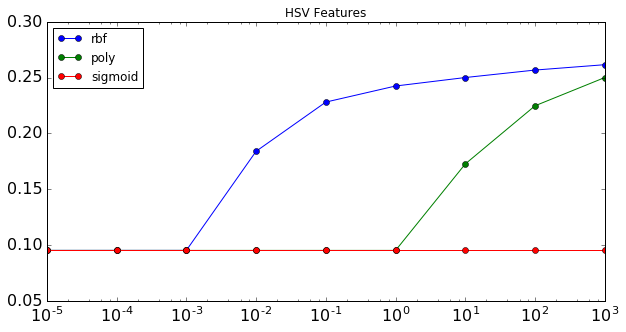

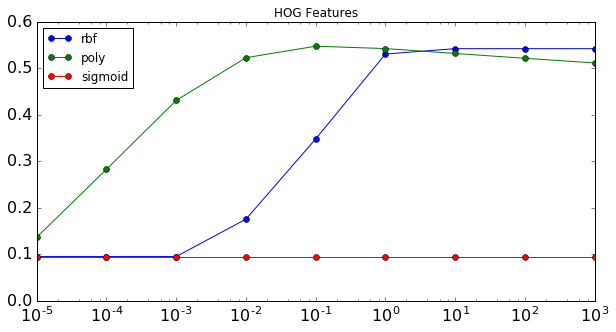

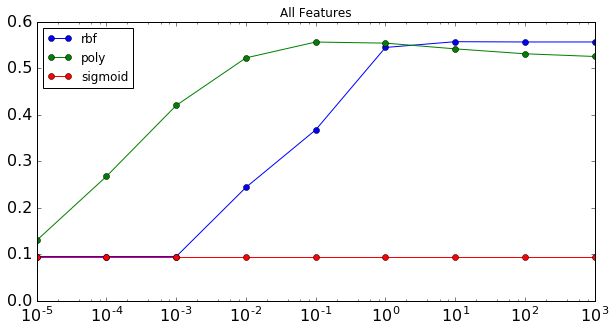

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
f = open("pregunta3_e.csv", "r")
C = np.logspace(-5, 3, 9)
data = pd.read_csv(f, sep=";", header=1)

hsv_features = data[28:55]['Score'].reshape(3,9)
df = pd.DataFrame(index=['rbf', 'poly', 'sigmoid'], columns=C, data=hsv_features).T
f = plt.figure(figsize=(10, 5))
ax = df.plot(logx=True, fontsize=16, style='o-', ax=f.gca(), title="HSV Features")

hog_features = data[56:]['Score'].reshape(3,9)
df = pd.DataFrame(index=['rbf', 'poly', 'sigmoid'], columns=C, data=hog_features).T
f = plt.figure(figsize=(10, 5))
ax = df.plot(logx=True, fontsize=16, style='o-', ax=f.gca(), title="HOG Features")

all_features = data[0:27]['Score'].reshape(3,9)
df = pd.DataFrame(index=['rbf', 'poly', 'sigmoid'], columns=C, data=all_features).T
f = plt.figure(figsize=(10, 5))
ax = df.plot(logx=True, fontsize=16, style='o-', ax=f.gca(), title="All Features")

Es posible apreciar que el entrenamiento no tuvo un buen resultado. La probabilidad de elegir una imagen y clasificarla correctamente al azar es de 0.1, Los resultados con kernel sigmoidal son inferiores a 0.1, mientras que los kernels RBF y polinomial (grado 3) obtienen mejores resultados a medida que aumenta el parámetro de regularización $C$ de la SVM. Los mejores resultados se obtuvieron utilizando todas las features (55% de éxito).

## f) Árbol de clasificación para CIFAR10

In [12]:
from sklearn.tree import DecisionTreeClassifier

Xtr, Ytr, Xval, Yval, Xte, Yte = load_CIFAR10('.')

features_Xtr_hsv = extract_features(Xtr,[color_histogram_hsv])
features_Xval_hsv = extract_features(Xval,[color_histogram_hsv])
features_Xtr_hog = extract_features(Xtr,[hog_features])
features_Xval_hog = extract_features(Xval,[hog_features])
features_Xtr_all = extract_features(Xtr,[color_histogram_hsv, hog_features])
features_Xval_all = extract_features(Xval,[color_histogram_hsv, hog_features])

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 32, 32, 3)
(10000, 32, 32, 3)


In [13]:
depths = np.arange(2, 22, 2)

In [19]:
print "Features raw pixel"
Xtr, Ytr, Xval, Yval, Xte, Yte = load_CIFAR10('.')
Xtr_scaled, Xval_scaled, Xte_scaled = scaler_function(Xtr, Xval, Xte, other=False)
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(features_Xtr_hsv, Ytr)
    print "Arbol de profundidad %s"%d+". Score en conjunto de evaluacion: %s"%clf.score(features_Xval_hsv, Yval)

Features raw pixel
Arbol de profundidad 2. Score en conjunto de evaluacion: 0.1943
Arbol de profundidad 4. Score en conjunto de evaluacion: 0.2223
Arbol de profundidad 6. Score en conjunto de evaluacion: 0.2392
Arbol de profundidad 8. Score en conjunto de evaluacion: 0.2489
Arbol de profundidad 10. Score en conjunto de evaluacion: 0.2482
Arbol de profundidad 12. Score en conjunto de evaluacion: 0.2451
Arbol de profundidad 14. Score en conjunto de evaluacion: 0.2289
Arbol de profundidad 16. Score en conjunto de evaluacion: 0.2233
Arbol de profundidad 18. Score en conjunto de evaluacion: 0.2157
Arbol de profundidad 20. Score en conjunto de evaluacion: 0.2081


In [14]:
print "Features HSV"
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(features_Xtr_hsv, Ytr)
    print "Arbol de profundidad %s"%d+". Score en conjunto de evaluacion: %s"%clf.score(features_Xval_hsv, Yval)

Features HSV
Arbol de profundidad 2. Score en conjunto de evaluacion: 0.1943
Arbol de profundidad 4. Score en conjunto de evaluacion: 0.2223
Arbol de profundidad 6. Score en conjunto de evaluacion: 0.2392
Arbol de profundidad 8. Score en conjunto de evaluacion: 0.2487
Arbol de profundidad 10. Score en conjunto de evaluacion: 0.2481
Arbol de profundidad 12. Score en conjunto de evaluacion: 0.2452
Arbol de profundidad 14. Score en conjunto de evaluacion: 0.2282
Arbol de profundidad 16. Score en conjunto de evaluacion: 0.2237
Arbol de profundidad 18. Score en conjunto de evaluacion: 0.2138
Arbol de profundidad 20. Score en conjunto de evaluacion: 0.2058


In [15]:
print "Features HOG"
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(features_Xtr_hog, Ytr)
    print "Arbol de profundidad %s"%d+". Score en conjunto de evaluacion: %s"%clf.score(features_Xval_hog, Yval)

Features HOG
Arbol de profundidad 2. Score en conjunto de evaluacion: 0.1717
Arbol de profundidad 4. Score en conjunto de evaluacion: 0.2323
Arbol de profundidad 6. Score en conjunto de evaluacion: 0.2662
Arbol de profundidad 8. Score en conjunto de evaluacion: 0.2789
Arbol de profundidad 10. Score en conjunto de evaluacion: 0.2832
Arbol de profundidad 12. Score en conjunto de evaluacion: 0.2699
Arbol de profundidad 14. Score en conjunto de evaluacion: 0.2664
Arbol de profundidad 16. Score en conjunto de evaluacion: 0.2615
Arbol de profundidad 18. Score en conjunto de evaluacion: 0.2524
Arbol de profundidad 20. Score en conjunto de evaluacion: 0.249


In [16]:
print "Features ALL"
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(features_Xtr_all, Ytr)
    print "Arbol de profundidad %s"%d+". Score en conjunto de evaluacion: %s"%clf.score(features_Xval_all, Yval)

Features ALL
Arbol de profundidad 2. Score en conjunto de evaluacion: 0.1943
Arbol de profundidad 4. Score en conjunto de evaluacion: 0.2366
Arbol de profundidad 6. Score en conjunto de evaluacion: 0.2888
Arbol de profundidad 8. Score en conjunto de evaluacion: 0.3108
Arbol de profundidad 10. Score en conjunto de evaluacion: 0.3179
Arbol de profundidad 12. Score en conjunto de evaluacion: 0.3074
Arbol de profundidad 14. Score en conjunto de evaluacion: 0.2953
Arbol de profundidad 16. Score en conjunto de evaluacion: 0.2896
Arbol de profundidad 18. Score en conjunto de evaluacion: 0.2826
Arbol de profundidad 20. Score en conjunto de evaluacion: 0.2852


El entrenamiento con árboles de clasificación fue peor que con SVM. Un árbol de profundidad 8 o 10 posee los mejores resultados, correspondientes a un score de 0.3 (0.2 mejor que un resultado al azar).